### **Furniture Sales Forecasting**

In [67]:
#importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import itertools
import seaborn as sns

In [41]:
#reading data
df=pd.read_csv("/content/drive/MyDrive/superstore_train.csv")

In [42]:
#data_set
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21-05-2017,28-05-2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12-01-2016,17-01-2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12-01-2016,17-01-2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12-01-2016,17-01-2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [43]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [44]:
#null values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [45]:
#Check the different types of product categories included
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [46]:
#Now we create a dataframe which includes only data related to furniture sales. 
furniture = df.loc[df['Category'] == 'Furniture']
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,6,CA-2015-115812,09-06-2015,14-06-2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
10,11,CA-2015-115812,09-06-2015,14-06-2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9786,9787,US-2015-114377,05-11-2015,05-11-2015,Same Day,BG-11035,Barry Gonzalez,Consumer,United States,Hampton,Virginia,23666.0,South,FUR-CH-10004754,Furniture,Chairs,"Global Stack Chair with Arms, Black",149.9000
9787,9788,CA-2018-144491,27-03-2018,01-04-2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",1023.3320
9788,9789,CA-2018-144491,27-03-2018,01-04-2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,600.5580
9790,9791,CA-2018-144491,27-03-2018,01-04-2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10001714,Furniture,Chairs,"Global Leather & Oak Executive Chair, Burgundy",211.2460


In [47]:
#taking needed columns

furniture=furniture[["Order Date","Sales"]]

In [48]:
furniture

,Order Date,Sales
0,08-11-2017,261.9600
1,08-11-2017,731.9400
3,11-10-2016,957.5775
5,09-06-2015,48.8600
10,09-06-2015,1706.1840
...,...,...
9786,05-11-2015,149.9000
9787,27-03-2018,1023.3320
9788,27-03-2018,600.5580
9790,27-03-2018,211.2460


In [49]:
#renaming order date
furniture.rename(columns = {'Order Date':'Date'}, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
furniture


,Date,Sales
0,08-11-2017,261.9600
1,08-11-2017,731.9400
3,11-10-2016,957.5775
5,09-06-2015,48.8600
10,09-06-2015,1706.1840
...,...,...
9786,05-11-2015,149.9000
9787,27-03-2018,1023.3320
9788,27-03-2018,600.5580
9790,27-03-2018,211.2460


In [51]:
#converting to date format
furniture['Date'] = pd.to_datetime(furniture.Date)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
furniture["Date"]

0      2017-08-11
1      2017-08-11
3      2016-11-10
5      2015-09-06
10     2015-09-06
          ...    
9786   2015-05-11
9787   2018-03-27
9788   2018-03-27
9790   2018-03-27
9792   2015-05-21
Name: Date, Length: 2078, dtype: datetime64[ns]

In [53]:
#Know the earliest date recorded
furniture['Date'].min()

Timestamp('2015-01-03 00:00:00')

In [54]:
#Know the first date recorded
furniture['Date'].max()

Timestamp('2018-12-30 00:00:00')

In [56]:
#Now let's sort furniture datframe according to order date
furniture = furniture.sort_values('Date')
furniture


,Date,Sales
6547,2015-01-03,634.116
8310,2015-01-03,376.509
157,2015-01-03,457.568
7948,2015-01-03,362.250
7949,2015-01-03,63.552
...,...,...
5457,2018-12-29,68.460
7635,2018-12-29,300.980
1877,2018-12-29,393.568
7636,2018-12-29,258.750


In [58]:
#Now let's find how much total furniture sales occurred on each date
furniture = furniture.groupby('Date')['Sales'].sum().reset_index()
furniture

,Date,Sales
0,2015-01-03,1893.9950
1,2015-01-06,2024.0600
2,2015-01-08,44.1280
3,2015-01-11,31.6800
4,2015-01-12,4513.6060
...,...,...
872,2018-12-24,1393.4940
873,2018-12-25,832.4540
874,2018-12-28,551.2568
875,2018-12-29,2330.7180


In [59]:
#Now let's set the Order date column as the index column
furniture = furniture.set_index('Date')
furniture

,Sales
Date,
2015-01-03,1893.9950
2015-01-06,2024.0600
2015-01-08,44.1280
2015-01-11,31.6800
2015-01-12,4513.6060
...,...
2018-12-24,1393.4940
2018-12-25,832.4540
2018-12-28,551.2568


In [61]:
#printing index
furniture.index


DatetimeIndex(['2015-01-03', '2015-01-06', '2015-01-08', '2015-01-11',
               '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-16',
               '2015-01-19', '2015-01-20',
               ...
               '2018-12-18', '2018-12-19', '2018-12-21', '2018-12-22',
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Date', length=877, freq=None)

In [63]:
#Now let's resample the data into means of monthly sales of furniture and save this into a new variable called Order date
y_furniture = furniture['Sales'].resample('MS').mean()
y_furniture

Date
2015-01-01     924.024462
2015-02-01     248.475714
2015-03-01     778.884778
2015-04-01     525.167692
2015-05-01     390.457467
2015-06-01     611.823918
2015-07-01     601.328500
2015-08-01     762.809906
2015-09-01     844.152147
2015-10-01     818.771824
2015-11-01    1002.974167
2015-12-01    1380.420941
2016-01-01    1463.433262
2016-02-01     894.442556
2016-03-01     617.389662
2016-04-01     674.616300
2016-05-01     696.332806
2016-06-01     457.568789
2016-07-01     778.772438
2016-08-01     958.938643
2016-09-01    1452.349889
2016-10-01     758.091286
2016-11-01     836.532739
2016-12-01     716.510760
2017-01-01     613.566267
2017-02-01     557.091308
2017-03-01     806.122773
2017-04-01     584.444650
2017-05-01    1187.366147
2017-06-01     711.414500
2017-07-01     713.570353
2017-08-01     946.465800
2017-09-01     852.411695
2017-10-01     677.889150
2017-11-01     983.663476
2017-12-01    1273.200938
2018-01-01     976.935250
2018-02-01    1012.219150
2018-03

In [64]:
#Now let's check the monthly sales value happened in year 2017
print(y_furniture['2017':])

Date
2017-01-01     613.566267
2017-02-01     557.091308
2017-03-01     806.122773
2017-04-01     584.444650
2017-05-01    1187.366147
2017-06-01     711.414500
2017-07-01     713.570353
2017-08-01     946.465800
2017-09-01     852.411695
2017-10-01     677.889150
2017-11-01     983.663476
2017-12-01    1273.200938
2018-01-01     976.935250
2018-02-01    1012.219150
2018-03-01     621.655512
2018-04-01     557.245886
2018-05-01     539.623495
2018-06-01     768.796432
2018-07-01     618.579114
2018-08-01     964.181818
2018-09-01     996.806227
2018-10-01     753.598800
2018-11-01    1242.404375
2018-12-01     973.765627
Freq: MS, Name: Sales, dtype: float64


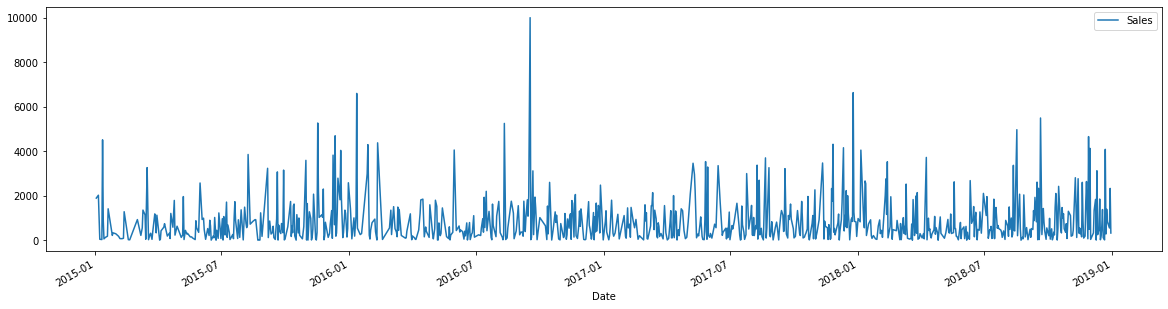

In [65]:
#plotting data
furniture.plot(figsize=(20,5))

Text(0, 0.5, 'Sales')

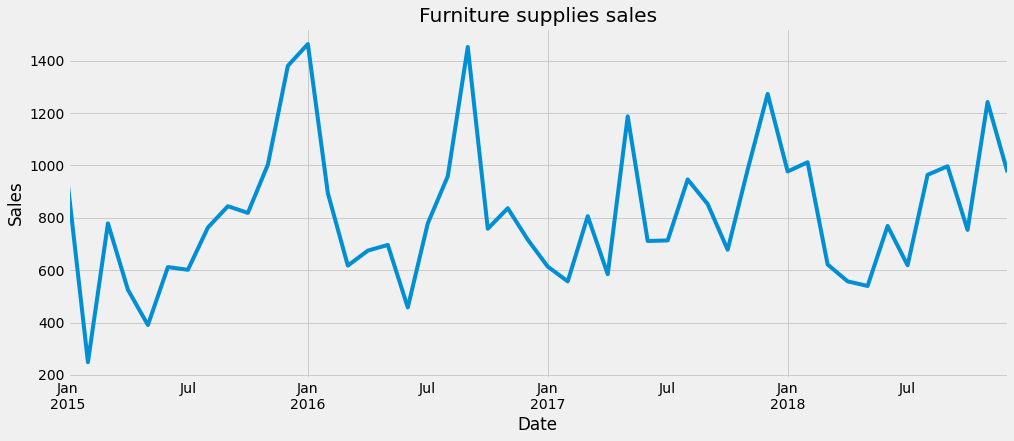

In [68]:
#plotting mean

y_furniture.plot(figsize=(15,6))
plt.title("Furniture supplies sales")
plt.ylabel("Sales")

Text(0.5, 1.0, 'Box Plot on furniture sales')

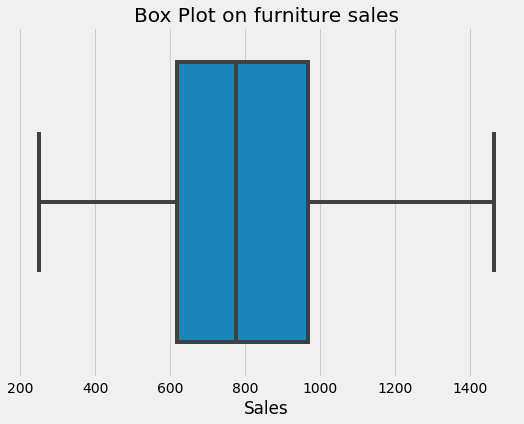

In [69]:
#bocplot of finding max and min sales
fig = plt.figure(figsize=(8,6))
sns.boxplot(y_furniture).set_title('Box Plot on furniture sales')

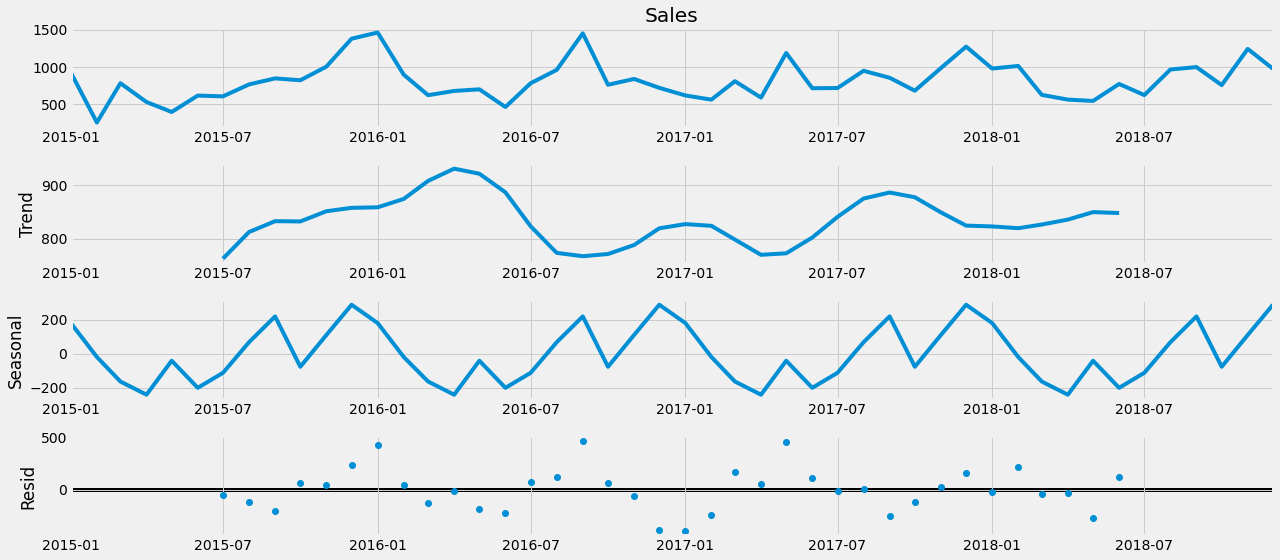

In [71]:
#analysing trend, seasonality and residuals


from pylab import rcParams

rcParams['figure.figsize']=18,8
decomposition_furniture = sm.tsa.seasonal_decompose(y_furniture,model='additive')
fig = decomposition_furniture.plot()
plt.show()

#ADF

In [72]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [73]:
#applying adf_test to data

adf_test(y_furniture)

Augmented Dickey-Fuller Test: 
ADF test statistic      -4.053964
p-value                  0.001153
# lags used             10.000000
# observations          37.000000
critical value (1%)     -3.620918
critical value (5%)     -2.943539
critical value (10%)    -2.610400
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
p value is less than .5 hence null hypo is rejected ... data is stationary

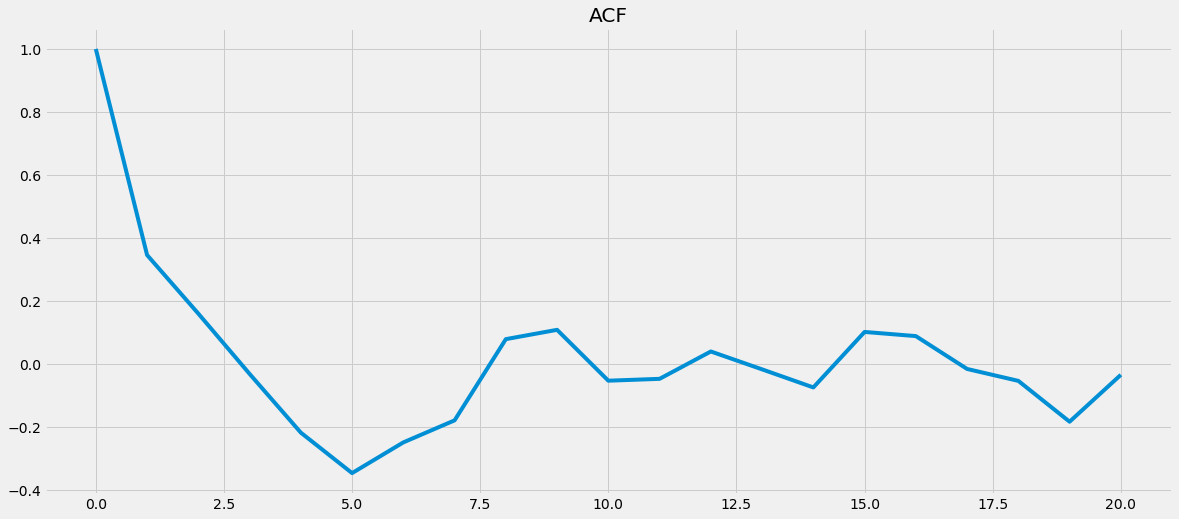

In [76]:
#plotting acf and pcf
from statsmodels.tsa.stattools import acf,pacf
p_acf=acf(y_furniture,nlags=20)
plt.title("ACF")
plt.plot(p_acf)

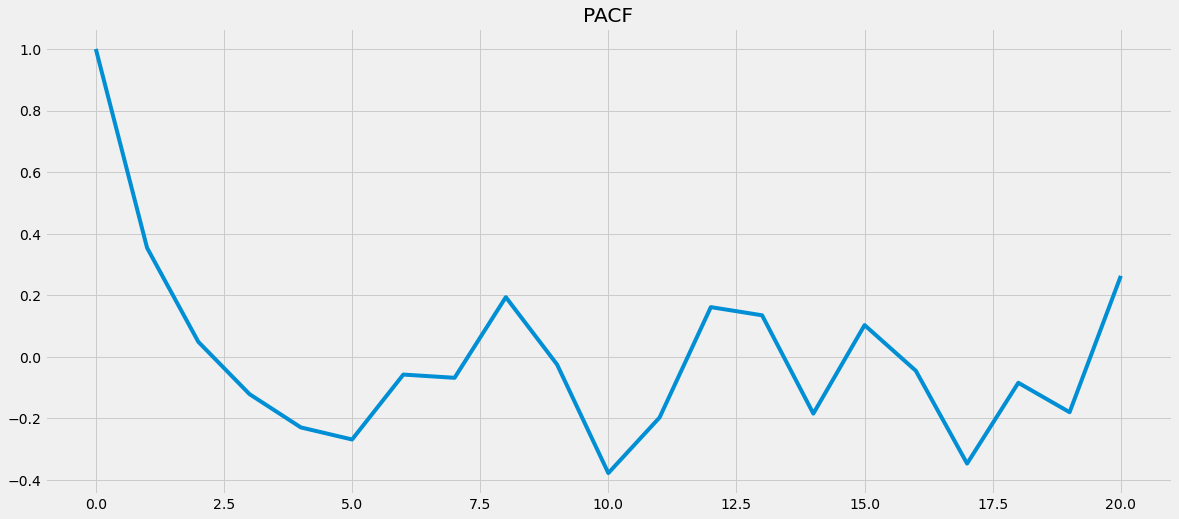

In [81]:
#PACF
p_acf=pacf(y_furniture,nlags=20)
plt.title("PACF")
plt.plot(p_acf)

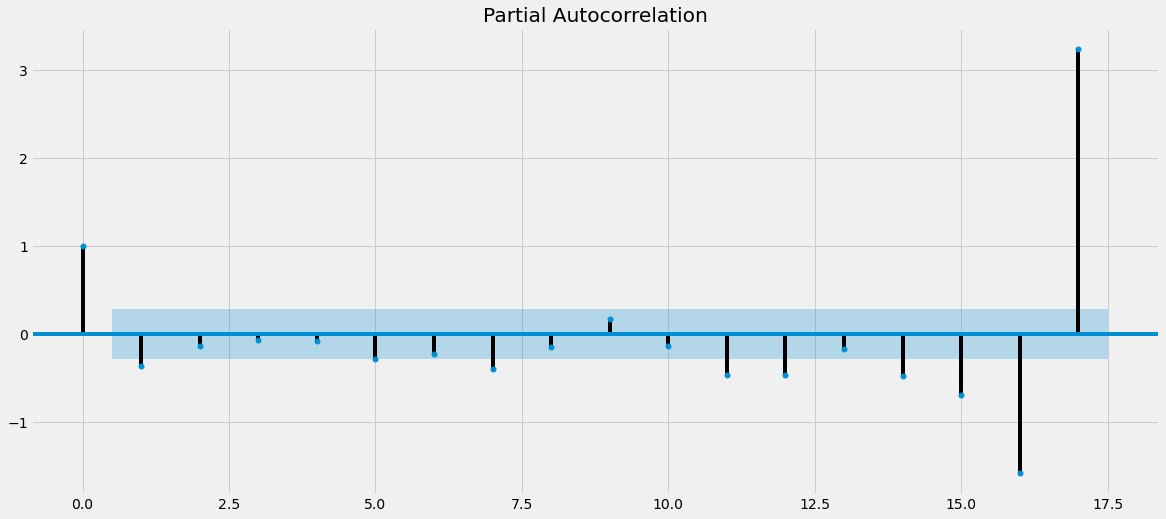

In [85]:
#PARTIAL AUTO CORRELATION / DIFFRENT VIEW
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
picpacf=plot_pacf(y_furniture.diff().dropna())

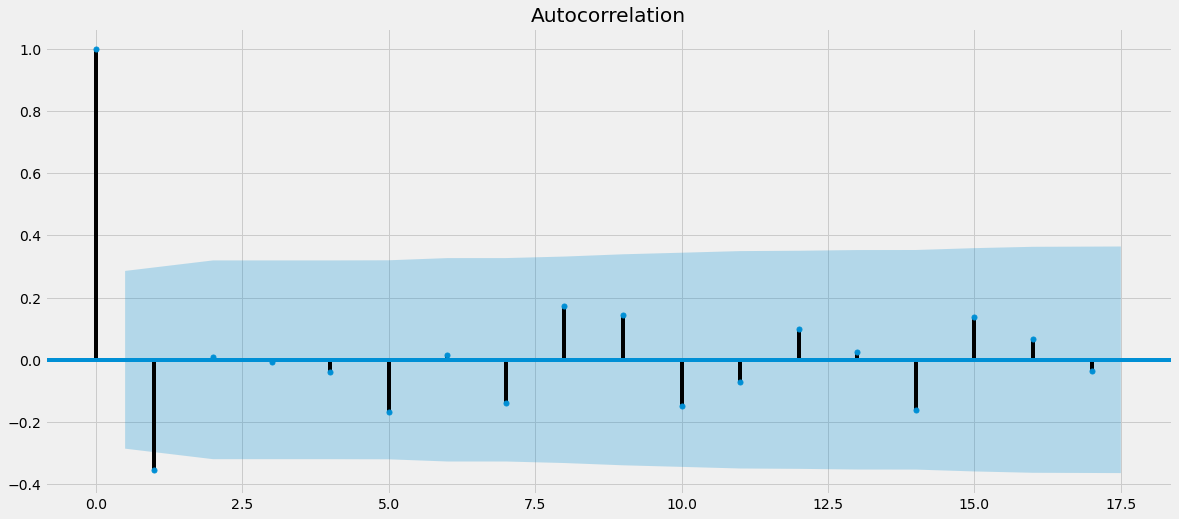

In [86]:
picpacf=plot_acf(y_furniture.diff().dropna())

In [87]:
#LENGTH OF DATA
len(y_furniture)

48

In [97]:
#SPLITTING INTO TRAIN AND TEST
train = y_furniture.iloc[:36]
test = y_furniture.iloc[36:]

### ARIMA MODEL

In [110]:
#FITTING MODEL

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(2,0,2))
model=model.fit(method_kwargs={'warn_convergence':False})
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                     ARMA(2, 2)   Log Likelihood                -250.275
Method:                       css-mle   S.D. of innovations            246.977
Date:                Mon, 24 Oct 2022   AIC                            512.551
Time:                        11:01:18   BIC                            522.052
Sample:                    01-01-2015   HQIC                           515.867
                         - 12-01-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         824.0245        nan        nan        nan         nan         nan
ar.L1.Sales    -0.7457        nan        nan        nan         nan         nan
ar.L2.Sales     0.2543        nan        nan        nan         nan         nan
ma.L1.Sales     1.1874      0.030     39.339      0.000       1.128       1.247
ma.L2.Sales     0.1881      0.030      6.227      0.000       0.129       0.247
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0000           +0.0000j            1.0000            0.5000
AR.2            3.9320           +0.0000j            3.9320            0.0000
MA.1           -1.0008           +0.0000j            1.0008            0.5000
MA.2           -5.3134           +0.0000j            5.3134            0.5000
-----------------------------------------------------------------------------
"""

In [111]:
from sklearn.metrics import mean_squared_error
pred=model.predict(start=len(train),end=len(train)+len(test)-1, dynamic=False)
ar_score=mean_squared_error(test,pred)

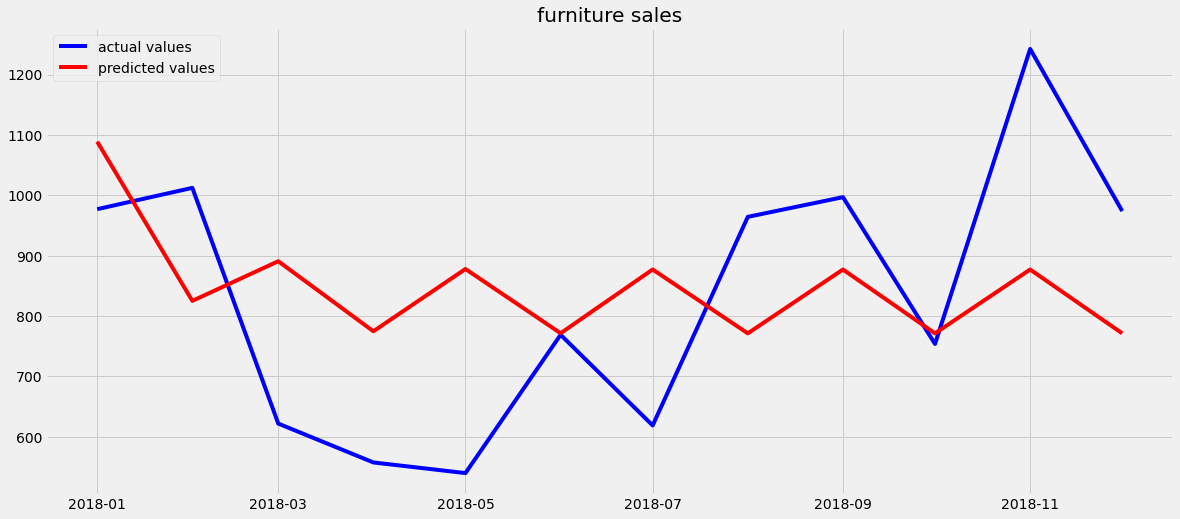

In [112]:
#predicted v/s actual

plt.plot(test,label="actual values",color="blue")
plt.plot(pred,label="predicted values",color="red")
plt.title("furniture sales")
plt.legend()
